### Task-1
Suppose we have a dataset containing the math test scores of two different schools, and we want to determine if there is a significant difference between the mean math scores of the two schools. The null hypothesis is that the mean math scores of the two schools are equal, and the alternative hypothesis is that they are not equal. Using a significance level of 0.05, perform an independent two-sample t-test on the data and interpret the results.

Dataset:
```
School A: [75, 80, 90, 85, 70, 75, 80, 85, 90, 95, 80, 75, 85, 90, 95, 80, 75, 70, 85, 90, 95, 75, 70, 80, 85]
School B: [80, 75, 85, 90, 95, 70, 75, 80, 85, 90, 85, 75, 80, 90, 95, 85, 75, 70, 80, 90, 85, 70, 75, 80, 85]
```
Question 1: Perform normality test and equal variance test for both schools.

Question 2: Is there a significant difference between the mean math scores of the two schools?

In [ ]:
# H0 mean_A = mean_B
# H1 mean_A != mean_B

### Question 1: Perform normality test and equal variance test for both schools.

In [28]:
import numpy as np
from scipy.stats import shapiro,levene,t,norm
import seaborn as sns
import scipy.stats as stats

In [12]:
alpha = 0.05

In [13]:
schoolA = [75, 80, 90, 85, 70, 75, 80, 85, 90, 95, 80, 75, 85, 90, 95, 80, 75, 70, 85, 90, 95, 75, 70, 80, 85]
schoolB = [80, 75, 85, 90, 95, 70, 75, 80, 85, 90, 85, 75, 80, 90, 95, 85, 75, 70, 80, 90, 85, 70, 75, 80, 85]

##### Check normality assumption

In [14]:
shapiro_test_A = shapiro(schoolA)
shapiro_test_B = shapiro(schoolB)
print(shapiro_test_A)
print(shapiro_test_B)

ShapiroResult(statistic=0.9325841069221497, pvalue=0.09972038120031357)
ShapiroResult(statistic=0.9396081566810608, pvalue=0.14497657120227814)


In [ ]:
# in both samples pvalue > 0.05 hence both samples are normally distributed by shapiro test

<AxesSubplot: ylabel='Density'>

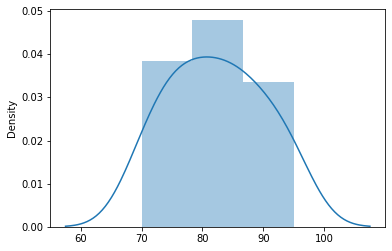

In [19]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(schoolA)

<AxesSubplot: ylabel='Density'>

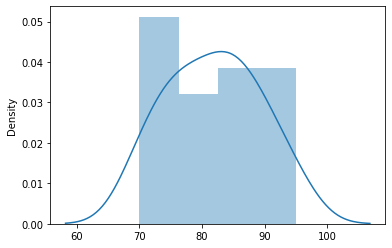

In [20]:
sns.distplot(schoolB)

##### Check homoscedasticity assumption(Equal variance test)

In [22]:
levene_test = levene(schoolA,schoolB)
print(levene_test)

LeveneResult(statistic=0.09599999999999974, pvalue=0.7580248392839517)


In [ ]:
# since pvalue > 0.05 var(schoolA) = var(schoolB)

### Question 2: Is there a significant difference between the mean math scores of the two schools?

##### Calculate t score

In [44]:
t_score = x1_bar - x2_bar / np.sqrt((s1**2/n1)+(s2**2/n2))

In [67]:
x1_bar = np.array(schoolA).mean()
x2_bar = np.array(schoolB).mean()
s1 = np.array(schoolA).std(ddof=1) # ddof is use to calculate std for sample ddof is degree of freedom 
s2 = np.array(schoolB).std(ddof=1)
n1 = len(schoolA)
n2 = len(schoolB)
df = n1+n2-2

##### Note This formula is for Welch t test where assumption of equal variance fail 

In [46]:
t_score = (x1_bar - x2_bar) / np.sqrt((s1**2/n1)+(s2**2/n2))
t_score

0.18738292224896805

### Correct Formula
- t_score = (x1_bar - x2_bar) / Sp * np.sqrt((1/n1)+(1/n2))
- Sp is pooled standard deviation
- Sp = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2)/df)
- df = n1+n2-2

$$
s_p = \sqrt{ \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2} }
$$

In [75]:
Sp = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2))
t_score = (x1_bar - x2_bar) / (Sp * np.sqrt(1/n1+1/n2))
t_score

0.183597018408634

In [76]:
# pvalue by cdf
cdf_value = t.cdf(-t_score,df)
pvalue = cdf_value*2
pvalue

0.8551029845205447

In [77]:
t_statistic,pvalue = stats.ttest_ind(schoolA,schoolB)
print(t_statistic)
print(pvalue)

0.18359701840863396
0.8551029845205448


In [78]:
# Since pvalue > 0.05 fail to reject null hypothesis, though we fail to reject it does not mean null hypothesis is true

- H0 mean_A = mean_B &#9989;
- H1 mean_A != mean_B &#10060; 

### Task 2:
Suppose we have a dataset containing the weights (in pounds) of 30 randomly selected male college students and 25 randomly selected female college students. We want to test if there is a significant difference in the average weight between male and female college students using a significance level of 0.05. Perform an independent two-sample t-test on the data and interpret the results.

Dataset:
```
Male Students: [155, 165, 170, 160, 180, 175, 185, 165, 175, 170, 165, 160, 180, 190, 195, 200, 185, 175, 170, 160, 180, 185, 190, 195, 200, 180, 175, 170, 160, 175]
Female Students: [125, 130, 135, 120, 140, 130, 135, 125, 115, 120, 130, 125, 140, 130, 135, 125, 115, 120, 130, 125, 140, 130, 135, 125, 115]

In [121]:
n1 = 30 
n2 = 25 
alpha = 0.05
df = n1 + n2 -2

- H0 : mean_weight(male) = mean_weight(female)
- H1 : mean_weight(male) != mean_weight(female)

In [111]:
male = [155, 165, 170, 160, 180, 175, 185, 165, 175, 170, 165, 160, 180, 190, 195, 200, 185, 175, 170, 160, 180, 185, 190, 195, 200, 180, 175, 170, 160, 175]
female = [125, 130, 135, 120, 140, 130, 135, 125, 115, 120, 130, 125, 140, 130, 135, 125, 115, 120, 130, 125, 140, 130, 135, 125, 115]

##### Check normality assumption

In [101]:
from scipy.stats import shapiro

In [112]:
shapiro_test_male = shapiro(male)
shapiro_test_female = shapiro(female)
print(shapiro_test_male)
print(shapiro_test_female)

ShapiroResult(statistic=0.9600324034690857, pvalue=0.31036627292633057)
ShapiroResult(statistic=0.9377318024635315, pvalue=0.1311926692724228)


In [103]:
# Since pvalue > 0.05 samples are normally distributed by shapiro test

##### Check equal variance assumption

In [113]:
from scipy.stats import levene

In [114]:
levene_test = levene(male,female)
levene_test

LeveneResult(statistic=4.822634851285497, pvalue=0.03248601340920137)

In [115]:
# Since pvalue < 0.05 var of sample male != var of sample female we cannot use equal variance t test use welch-ttest

In [116]:
x1_bar = np.mean(male)
x2_bar = np.mean(female)
s1 = np.std(male,ddof=1)
s2 = np.std(female,ddof=1)

In [117]:
t_score = (x1_bar - x2_bar) / np.sqrt((s1**2/n1)+(s2**2/n2))
t_score

17.6443397731328

In [127]:
cdf_value = t.cdf(-t_score,df)
p_value = cdf_value*2
p_value

7.664459654664423e-24

In [119]:
t_stat, p_value = stats.ttest_ind(male, female,equal_var=False)

In [128]:
p_value

7.664459654664423e-24

In [129]:
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


- H0 : mean_weight(male) = mean_weight(female) &#10060; 
- H1 : mean_weight(male) != mean_weight(female) &#9989;

### Task 3:
A professor wants to know if her introductory statistics class has a good grasp of basic math. Six students are chosen at random from the class and given a math proficiency test. The professor wants the class to be able to score above 70 on the test. The six students get scores of 62, 92, 75, 68, 83, and 95. Can the professor have 90 percent confidence that the mean score for the class on the test would be above 70?


In [137]:
n = 6
score = [62,92,75,68,83,95]
confidence_level = 0.90
alpha = 1 - confidence_level #(significance level)
alpha = round(alpha,2)

- H0 : mean(score) = 70 
- H1 : mean(score) > 70

<AxesSubplot: ylabel='Density'>

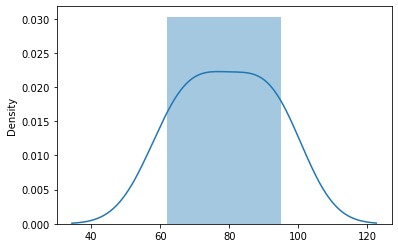

In [139]:
score = [62,92,75,68,83,95]
sns.distplot(score)

In [140]:
from scipy.stats import shapiro

In [141]:
shapiro_test = shapiro(score)
shapiro_test # here pvalue > 0.05 hence sample is normally distributed

ShapiroResult(statistic=0.9476593732833862, pvalue=0.7212929725646973)

In [142]:
# define the null hypothesis mean
null_mean = 70

In [ ]:
alternative Parameter
This defines the type of hypothesis test you're performing:

Value	              Meaning
'two-sided'	   Default. Tests if the mean ≠ null_mean
'less'	       Tests if the mean < null_mean (left-tailed test)
'greater'	   Tests if the mean > null_mean (right-tailed test)

In [150]:
t_stat,p_value = stats.ttest_1samp(score,null_mean,alternative='greater',nan_policy='omit')
print(f"P-value: {p_value:.3f}") # Weak evidence against null hypothesis 0.05 <= p < 0.1

P-value: 0.074


In [151]:
if p_value < alpha:
    print("Reject null hypothesis: The mean score for the class is significantly greater than 70.")
else:
    print("Fail to reject null hypothesis: The mean score for the class is not significantly greater than 70.")

Reject null hypothesis: The mean score for the class is significantly greater than 70.


- H0 : mean(score) = 70 &#10060; 
- H1 : mean(score) > 70 &#9989;

### Task 4: 
An experiment is conducted to determine whether intensive tutoring (covering a great deal of material in a fixed amount of time) is more effective than paced tutoring (covering less material in the same amount of time). Two randomly chosen groups are tutored separately and then administered proficiency tests. Use a significance level of α < 0.05.

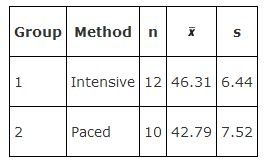

- H0 : μ1 = μ2
- H1 : μ1 > μ2

In [162]:
n1 = 12
n2 = 10
x1_bar = 46.31
x2_bar = 42.79
s1 = 6.44
s2 = 7.52
alpha = 0.05
df = None

### 🎯 Welch’s Degrees of Freedom Formula:

$$
df = \frac{
\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2
}{
\frac{ \left( \frac{s_1^2}{n_1} \right)^2 }{n_1 - 1} +
\frac{ \left( \frac{s_2^2}{n_2} \right)^2 }{n_2 - 1}
}
$$


In [163]:
num = ((s1**2/n1) + (s2**2/n2))**2
den = ((s1**2/n1)**2/(n1-1)) + ((s2**2/n2)**2/(n2-1))
df = num/den
df

17.894031520595746

In [178]:
t_score = (x1_bar - x2_bar) / np.sqrt((s1**2/n1)+(s2**2/n2))
t_score = round(t_score,2)
t_score

1.17

In [176]:
cdf_value = t.cdf(t_score,df)
p_value = 1 - cdf_value
round(p_value,2)

0.13

In [177]:
if p_value < alpha:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

fail to reject null hypothesis


- H0 : μ1 = μ2 &#9989;
- H1 : μ1 > μ2 &#10060;

In [190]:
import math

### Task 5:
Estimate a 90 percent confidence interval for the difference between the number of raisins per box in two brands of breakfast cereal.

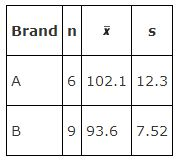

In [186]:
#Brand A
n1 = 6
x1_bar = 102.1
s1 = 12.3

#Brand B
n2 = 9
x2_bar = 93.6
s2 = 7.52

alpha = (1-0.90)
alpha = round(alpha,2)

In [188]:
# point estimate
point_estimate = x1_bar - x2_bar
print("Point estimate: ", point_estimate)

Point estimate:  8.5


In [191]:
# standard error
std_error = math.sqrt(((s1 ** 2) / n1) + ((s2 ** 2) / n2))
print("Standard error: ", std_error)

Standard error:  5.61234155925829


In [199]:
# degrees of freedom
num = ((s1**2/n1) + (s2**2/n2))**2
den = ((s1**2/n1)**2/(n1-1)) + ((s2**2/n2)**2/(n2-1))
df = num/den
df= round(df,2)
df

7.51

In [200]:
# Critical t-value
from scipy import stats
t_crit = stats.t.ppf(1 - (alpha/2),df)
t_crit

1.8753996658908556

In [ ]:
CI = x_bar +- MOE
MOE = t_crit * standard_error
standard_error = s/sqrt(n)

In [201]:
margin_error = t_crit * std_error

In [202]:
lower_limit = point_estimate - margin_error
upper_limit = point_estimate + margin_error

In [203]:
print("90% Confidence interval: (", lower_limit, ",", upper_limit, ")")

90% Confidence interval: ( -2.025383485098361 , 19.02538348509836 )
